In [1]:
# 합성곱 신경망의 시각화

In [2]:
# 케라스 버전

In [3]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [4]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.004989596 0.20153806


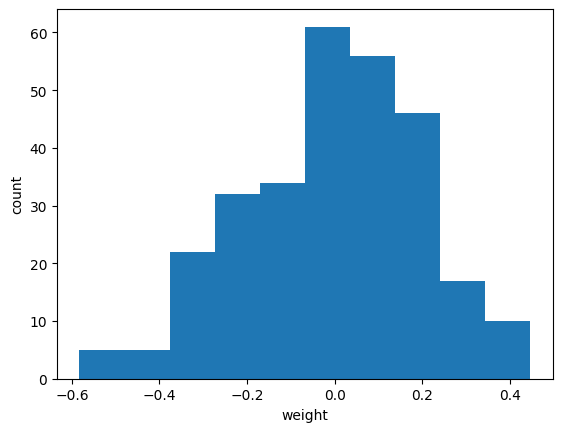

In [7]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

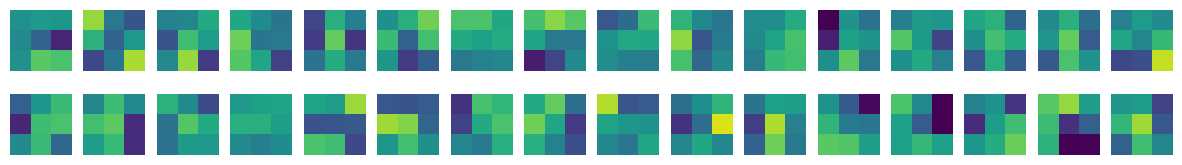

In [8]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [9]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same'))

In [10]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [11]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0041051186 0.081207216


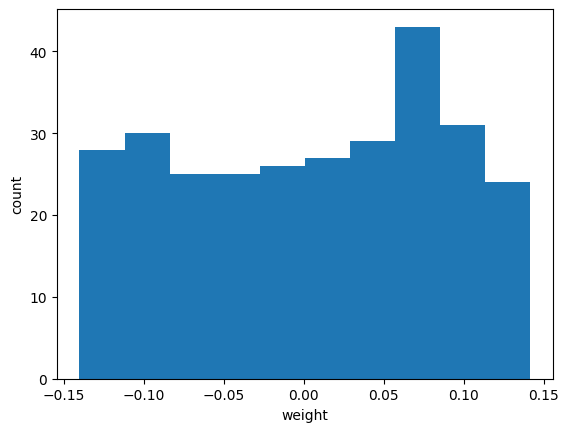

In [12]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

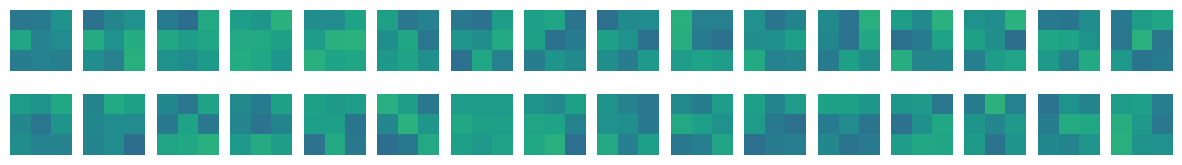

In [13]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j],\
                         vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [14]:
# 함수형 API

In [15]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [16]:
hidden = dense1(inputs)

In [17]:
outputs = dense2(hidden)

In [18]:
func_model = keras.Model(inputs, outputs)

In [19]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [20]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


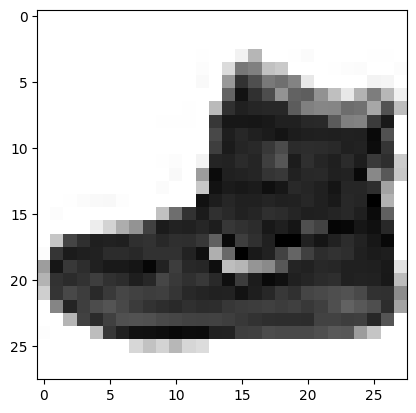

In [21]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [22]:
ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(ankle_boot)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [23]:
print(feature_maps.shape)

(1, 28, 28, 32)


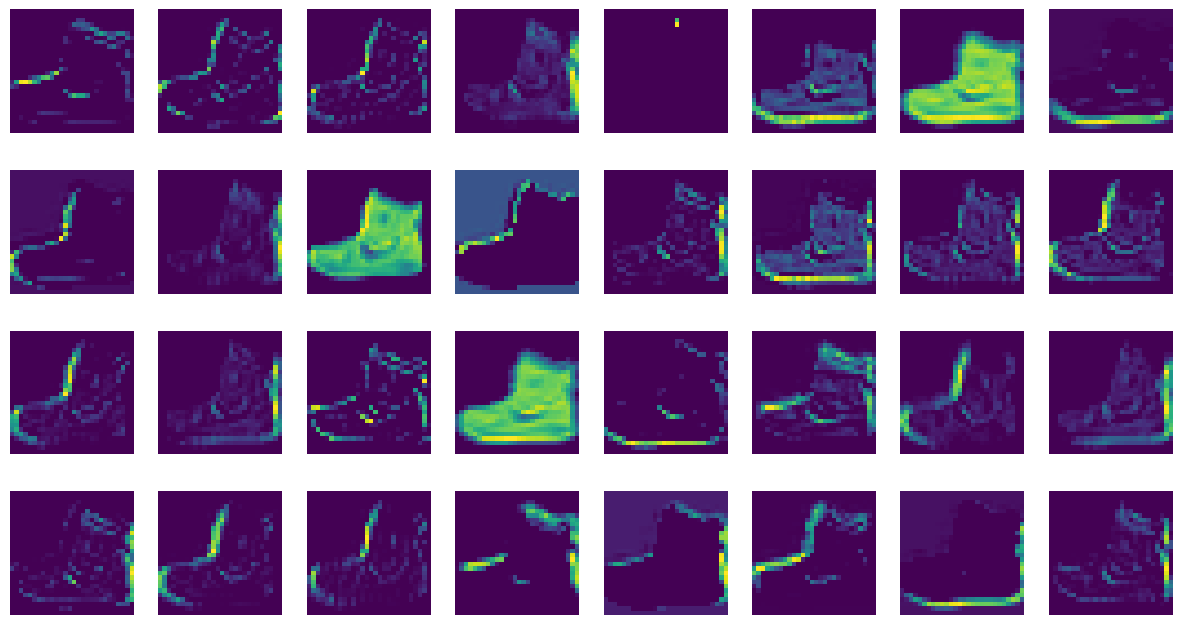

In [24]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [25]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)
feature_maps = conv2_acti.predict(ankle_boot)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
(1, 14, 14, 64)


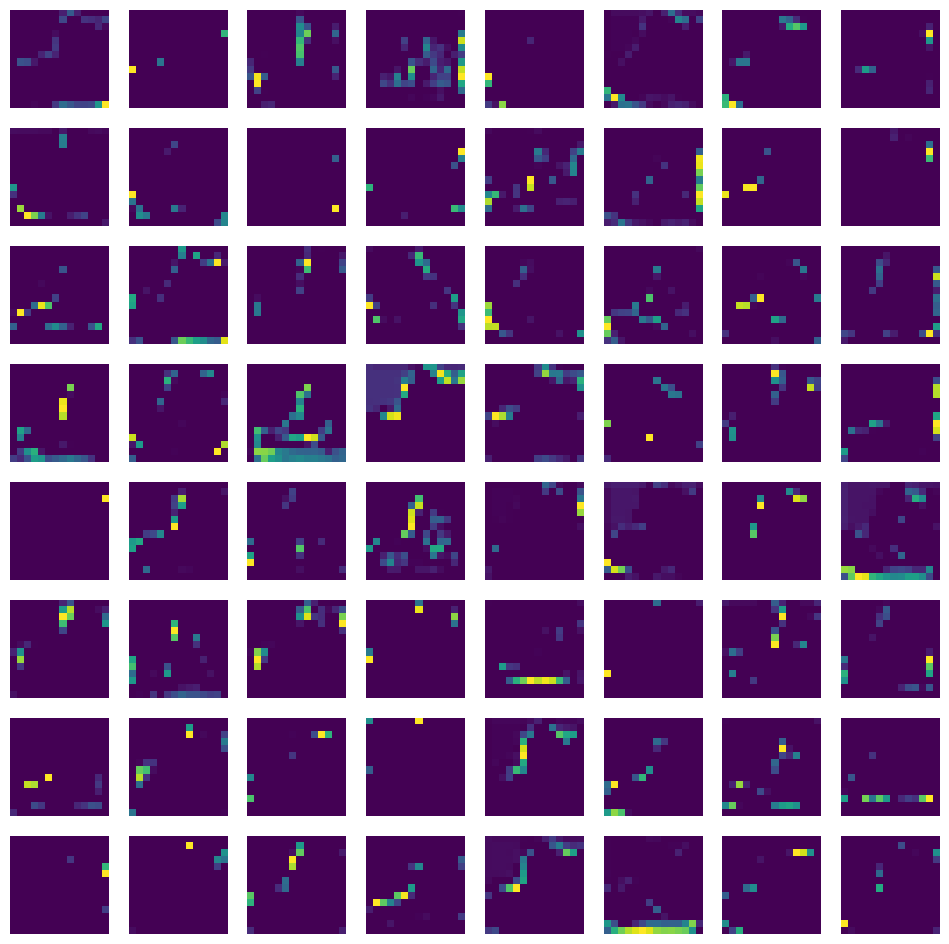

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [27]:
# 파이토치 버전

In [28]:
import torch.nn as nn

model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1, 32, kernel_size=3, padding='same'))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))
model.add_module('conv2', nn.Conv2d(32, 64, kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())
model.add_module('dense1', nn.Linear(3136, 100))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100, 10))

In [30]:
import torch

model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))

<All keys matched successfully>

In [31]:
layers = [layer for layer in model.children()]

In [32]:
print(layers[0])

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)


In [33]:
model[0]

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [34]:
for name, layer in model.named_children():
    print(f"{name:10s}", layer)

conv1      Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu1      ReLU()
pool1      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2      Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
relu2      ReLU()
pool2      MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
flatten    Flatten(start_dim=1, end_dim=-1)
dense1     Linear(in_features=3136, out_features=100, bias=True)
relu3      ReLU()
dropout    Dropout(p=0.3, inplace=False)
dense2     Linear(in_features=100, out_features=10, bias=True)


In [35]:
model.conv1

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)

In [36]:
conv_weights = model.conv1.weight.data
print(conv_weights.mean(), conv_weights.std())

tensor(-0.0935) tensor(0.4447)


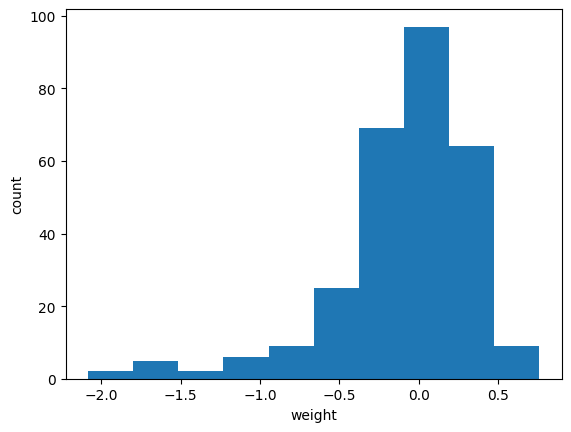

In [37]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [38]:
print(conv_weights.shape)

torch.Size([32, 1, 3, 3])


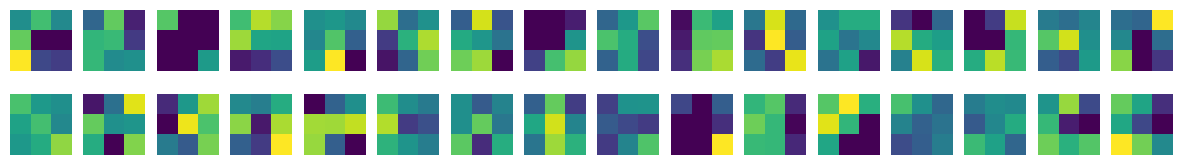

In [39]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[i*16 + j,0,:,:], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [40]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
train_input = fm_train.data

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.33MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.69MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


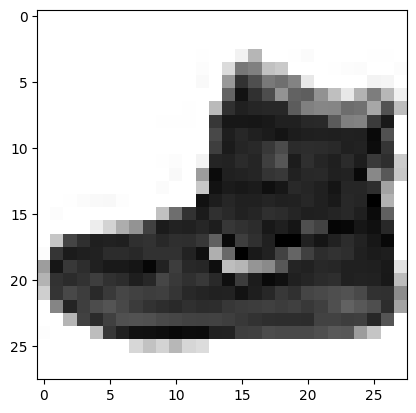

In [41]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [42]:
ankle_boot = train_input[0:1].reshape(1, 1, 28, 28) / 255.0

model.eval()
with torch.no_grad():
    feature_maps = model.conv1(ankle_boot)
    feature_maps = model.relu1(feature_maps)

In [43]:
print(feature_maps.shape)

torch.Size([1, 32, 28, 28])


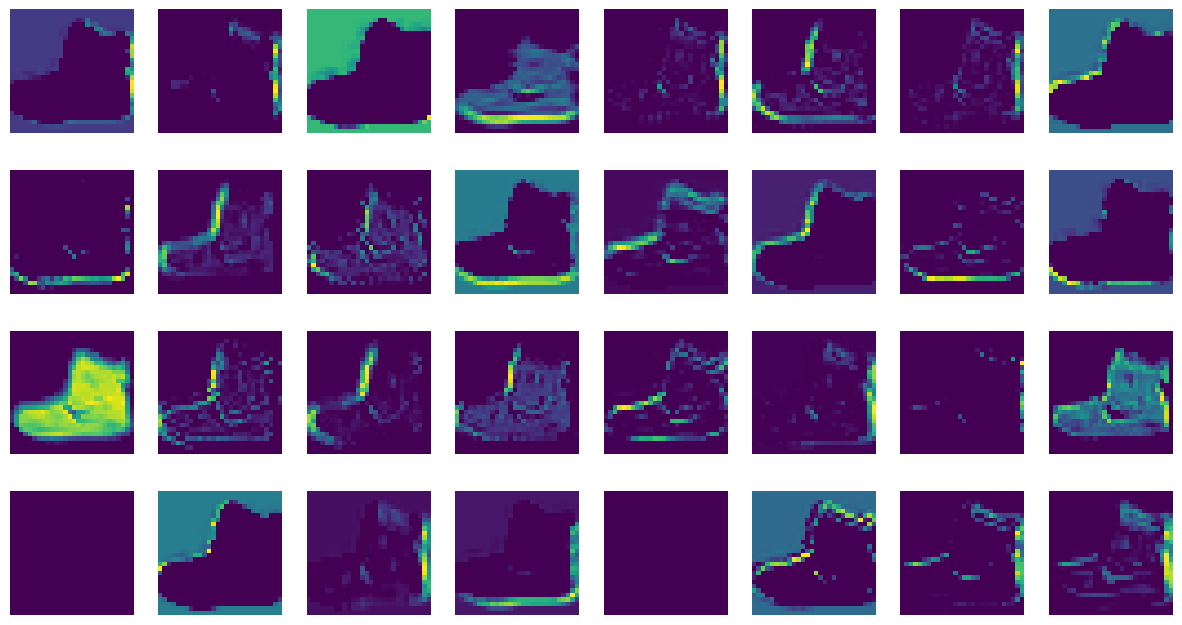

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,i*8 + j,:,:])
        axs[i, j].axis('off')
plt.show()

In [46]:
model.eval()
x = ankle_boot
with torch.no_grad():
    for name, layer in model.named_children():
        x = layer(x)
        if name == 'relu2':
            break
feature_maps = x

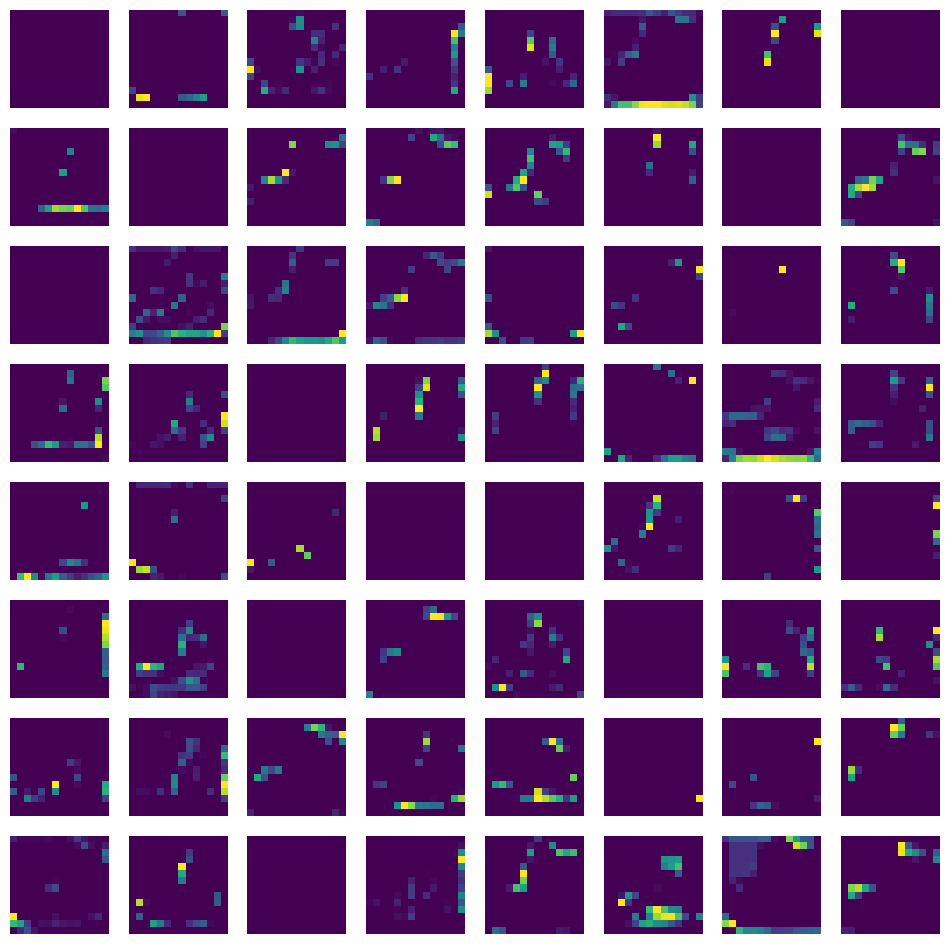

In [47]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,i*8 + j,:,:])
        axs[i, j].axis('off')
plt.show()